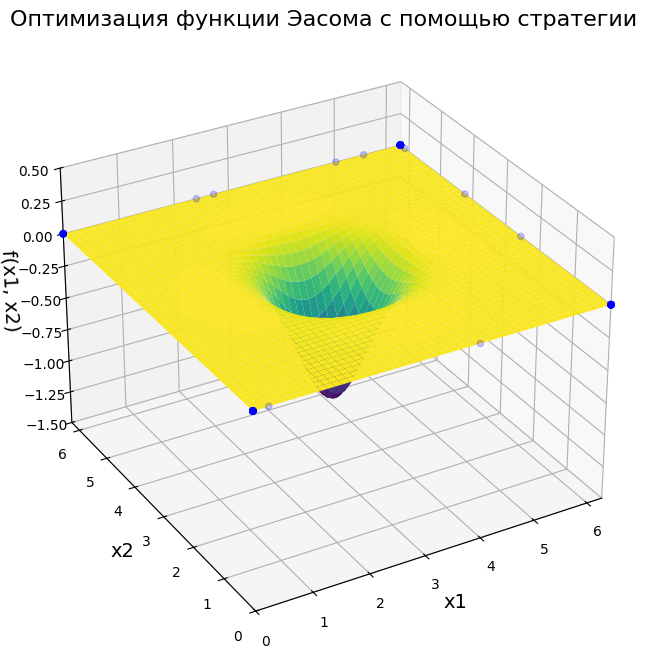

Остановка на поколении 231 из-за отсутствия улучшений за 100 поколений.
Лучшее найденное решение (ЭС): x1 = 3.116985, x2 = 3.144716
Значение функции в этой точке (ЭС): -0.999077
Известный оптимум: f(x1,x2) = -1 при (x1,x2) = (pi, pi)
Время выполнения программы: 28.12 секунд


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Функция Эасома
def fEaso(x):
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-((x[0] - np.pi) ** 2 + (x[1] - np.pi) ** 2))

# Параметры эволюционной стратегии
population_size = 300          # Размер популяции
max_generations = 300           # Максимальное количество поколений
mutation_probability = 0.5      # Вероятность мутации
mutation_sigma = 0.5            # Стандартное отклонение для мутации
no_improvement_limit = 100       # Лимит поколений без улучшений для остановки

# Диапазоны для визуализации и ограничений популяции
x_min_vis, x_max_vis = 0, 2 * np.pi

# Инициализация начальной популяции в диапазоне от 0 до 2π
initial_population = np.random.uniform(-100, 100, (population_size, 2))

# Начало замера времени
start_time = time.time()

best_fitness_history = []
best_solution = initial_population[0]
best_fitness = fEaso(best_solution)

# Задаем известный экстремум
real_extremum = np.array([np.pi, np.pi])
real_extremum_fitness = fEaso(real_extremum)

# Построение 3D-графика функции Эасома в пределах от 0 до 2π
x1 = np.linspace(x_min_vis, x_max_vis, 200)
x2 = np.linspace(x_min_vis, x_max_vis, 200)
x1, x2 = np.meshgrid(x1, x2)
z = fEaso([x1, x2])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x1, x2, z, cmap='viridis', edgecolor='none')

# Установ границы осей от 0 до 2π
ax.set_xlim([x_min_vis, x_max_vis])
ax.set_ylim([x_min_vis, x_max_vis])
ax.set_zlim([-1.5, 0.5])  # Пределы для лучшей видимости углубления

ax.view_init(elev=30, azim=240)
ax.set_title('Оптимизация функции Эасома с помощью стратегии', fontsize=16)
ax.set_xlabel('x1', fontsize=14)
ax.set_ylabel('x2', fontsize=14)
ax.set_zlabel('f(x1, x2)', fontsize=14)

# Основной цикл эволюционной стратегии
no_improvement_count = 0

for generation in range(max_generations):
    # Оценка популяции
    fitness_values = np.array([fEaso(ind) for ind in initial_population])

    # Поиск лучшего решения
    current_best_fitness = np.min(fitness_values)
    best_idx = np.argmin(fitness_values)

    if current_best_fitness < best_fitness:
        best_fitness = current_best_fitness
        best_solution = initial_population[best_idx]
        no_improvement_count = 0  # Сброс при улучшении
    else:
        no_improvement_count += 1  # Увеличиваем счетчик без улучшения

    best_fitness_history.append(best_fitness)

    # Проверка условия остановки
    if no_improvement_count >= no_improvement_limit:
        print(f"Остановка на поколении {generation} из-за отсутствия улучшений за {no_improvement_limit} поколений.")
        break

    # Создание новой популяции
    new_population = []
    for _ in range(population_size):
        # Выбор родителя случайным образом
        parent = initial_population[np.random.choice(population_size)]
        
        # Мутация с вероятностью
        if np.random.rand() < mutation_probability:
            child = parent + np.random.normal(0, mutation_sigma, 2)
            child = np.clip(child, x_min_vis, x_max_vis)
        else:
            child = parent
        new_population.append(child)

    initial_population = np.array(new_population)

    # Отображение текущей популяции
    ax.scatter(initial_population[:, 0], initial_population[:, 1], fEaso(initial_population.T), 
               color='blue', alpha=0.2)    

    plt.pause(0.1)  # Пауза для пошагового просмотра

# Отображение найденного экстремума (ЭС)
ax.scatter(best_solution[0], best_solution[1], best_fitness, 
           color='red', s=100, label='Найденный минимум (ЭС)')

# Отображение реального экстремума
ax.scatter(real_extremum[0], real_extremum[1], real_extremum_fitness, 
           color='green', s=100, label='Известный минимум')

# Отображение точек популяции с меткой
ax.scatter([], [], [], color='blue', alpha=0.2, label='Точки популяции')  # Пустая точка для легенды

# Добавление условных обозначений
ax.legend(loc='upper right')

# Окончание замера времени
end_time = time.time()
execution_time = end_time - start_time

# Вывод результатов
print(f'Лучшее найденное решение (ЭС): x1 = {best_solution[0]:.6f}, x2 = {best_solution[1]:.6f}')
print(f'Значение функции в этой точке (ЭС): {best_fitness:.6f}')
print(f'Известный оптимум: f(x1,x2) = -1 при (x1,x2) = (pi, pi)')
print(f'Время выполнения программы: {execution_time:.2f} секунд')

plt.show()